## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87910968/87910968 [==============================] - 7s 0us/step


In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')
folders

['Datasets/train\\cloudy',
 'Datasets/train\\foggy',
 'Datasets/train\\rainy',
 'Datasets/train\\shine',
 'Datasets/train\\sunrise']

In [8]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1500 images belonging to 5 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 30 images belonging to 5 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=7,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\saad4\AppData\Local\Temp\ipykernel_30352\1106282907.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/7
47/47 [==============================] - 59s 1s/step - loss: 1.8990 - accuracy: 0.7913 - val_loss: 0.8661 - val_accuracy: 0.9000
Epoch 2/7
47/47 [==============================] - 50s 1s/step - loss: 0.5023 - accuracy: 0.9220 - val_loss: 0.7818 - val_accuracy: 0.9000
Epoch 3/7
47/47 [==============================] - 47s 996ms/step - loss: 0.3019 - accuracy: 0.9440 - val_loss: 0.8618 - val_accuracy: 0.9000
Epoch 4/7
47/47 [==============================] - 49s 1s/step - loss: 0.4701 - accuracy: 0.9207 - val_loss: 0.9754 - val_accuracy: 0.8333
Epoch 5/7
47/47 [==============================] - 48s 1s/step - loss: 0.3543 - accuracy: 0.9427 - val_loss: 0.6628 - val_accuracy: 0.8333
Epoch 6/7
47/47 [==============================] - 46s 969ms/step - loss: 0.1871 - accuracy: 0.9667 - val_loss: 1.1708 - val_accuracy: 0.8333
Epoch 7/7
47/47 [==============================] - 49s 1s/step - loss: 0.1883 - accuracy: 0.9667 - val_loss: 1.6273 - val_accuracy: 0.8667


In [18]:
import matplotlib.pyplot as plt

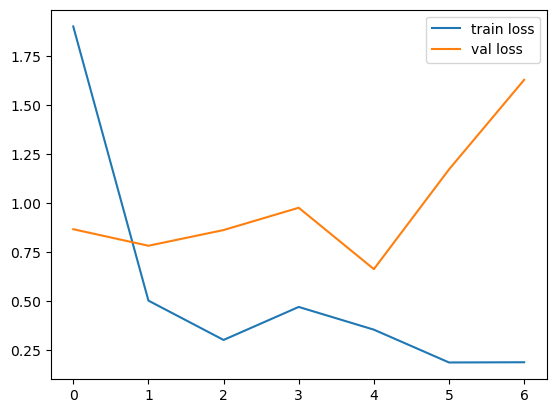

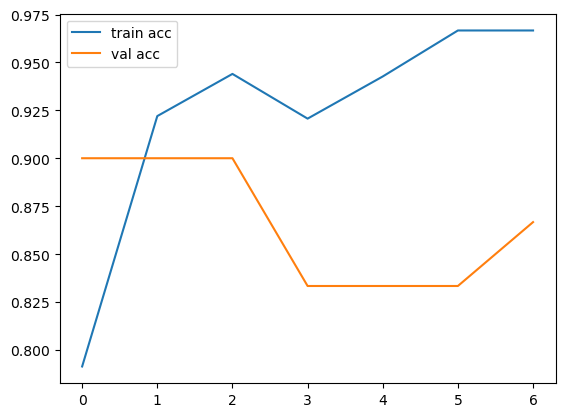

<Figure size 640x480 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [21]:

y_pred = model.predict(test_set)


1/1 [==============================] - 2s 2s/step


In [22]:
y_pred

array([[1.44174841e-12, 9.86743689e-01, 1.32558821e-02, 4.11702636e-08,
        4.46388896e-07],
       [1.10452697e-11, 8.48352611e-01, 6.58229236e-14, 3.37919424e-04,
        1.51309565e-01],
       [9.99999881e-01, 8.39806535e-09, 2.19177343e-09, 1.13461383e-07,
        1.78851600e-08],
       [7.24357665e-01, 3.54374447e-06, 3.49274608e-15, 2.75638729e-01,
        8.77428078e-12],
       [5.52996516e-01, 7.35381618e-05, 4.59210668e-03, 4.42336440e-01,
        1.43632792e-06],
       [1.90210544e-19, 1.88829929e-09, 1.00000000e+00, 8.72132280e-16,
        2.20278499e-15],
       [1.87084525e-19, 2.33661256e-21, 2.05644033e-25, 1.16732304e-14,
        1.00000000e+00],
       [5.92052978e-25, 2.30083244e-15, 1.00000000e+00, 5.89362111e-26,
        1.16040067e-23],
       [3.48657603e-38, 3.53770759e-27, 1.00000000e+00, 1.01155098e-25,
        2.23760627e-26],
       [7.20181892e-20, 2.22474306e-09, 4.11138614e-12, 2.00661016e-04,
        9.99799311e-01],
       [6.38053900e-13, 9.9272

In [64]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [24]:
y_pred

array([1, 1, 0, 0, 0, 2, 4, 2, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 4,
       3, 4, 3, 1, 3, 1, 3, 4], dtype=int64)

In [65]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [66]:
model=load_model('model_inception.h5')

In [28]:
img_data

NameError: name 'img_data' is not defined

In [109]:
img=image.load_img('Datasets/test/shine/shine_3.jpg',target_size=(224,224))



In [110]:
x=image.img_to_array(img)
x

array([[[ 88., 138., 189.],
        [ 89., 139., 190.],
        [ 91., 141., 192.],
        ...,
        [ 69., 122., 176.],
        [ 68., 121., 175.],
        [ 67., 120., 174.]],

       [[ 88., 138., 189.],
        [ 89., 139., 190.],
        [ 91., 141., 192.],
        ...,
        [ 69., 122., 176.],
        [ 68., 121., 175.],
        [ 67., 120., 174.]],

       [[ 88., 138., 189.],
        [ 89., 139., 190.],
        [ 91., 141., 192.],
        ...,
        [ 69., 122., 176.],
        [ 68., 121., 175.],
        [ 67., 120., 174.]],

       ...,

       [[136., 159., 177.],
        [135., 158., 176.],
        [132., 155., 173.],
        ...,
        [174., 190., 206.],
        [176., 192., 208.],
        [178., 194., 210.]],

       [[135., 158., 176.],
        [130., 153., 169.],
        [136., 157., 174.],
        ...,
        [184., 197., 213.],
        [186., 199., 215.],
        [188., 201., 217.]],

       [[135., 158., 176.],
        [130., 153., 169.],
        [136., 1

In [111]:
x.shape

(224, 224, 3)

In [112]:
x=x/255

In [113]:
import numpy as np
x=np.expand_dims(x,axis=0)
#img_data=preprocess_input(x)
#img_data.shape

In [114]:
model.predict(x)

1/1 [==============================] - 0s 49ms/step


array([[6.7404421e-10, 6.1967143e-10, 9.9334935e-14, 1.0000000e+00,
        3.5634175e-14]], dtype=float32)

In [115]:
a=np.argmax(model.predict(x), axis=1)
a

1/1 [==============================] - 0s 47ms/step


array([3], dtype=int64)

In [116]:
if a[0]==0:
    print("The image classified is cloudy")
elif a[0]==1:
    print("The image classified is foggy")
elif a[0]==2:
    print("The image classified is rainy")
elif a[0]==3:
    print("The image classified is shine")
else:
    print("The image classified is sunrise")

The image classified is shine


In [18]:
import tensorflow as tf

In [19]:
tf.__version__

'2.2.0'